In [1]:
# Pandas initialization
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)

In [2]:
# Organizing the data
from datetime import datetime

switch = {'no' : 0, 'yes' : 1}
data.sold = data.sold.map(switch)

current_year = datetime.today().year
data['age'] = current_year - data.model_year

data['km_per_year'] = data.mileage_per_year * 1.60934

data = data.drop(columns=["Unnamed: 0", "mileage_per_year", "model_year"])

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = data[["price", "age", "km_per_year"]]
y = data [["sold"]]
np.random.seed(15)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
model = LinearSVC()
model.fit(train_x,train_y)
accuracy = model.score(test_x, test_y) * 100
print("Accuracy: %.2f%%" % accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 52.32%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier()
dummy.fit(train_x, train_y)
accuracy = dummy.score(test_x, test_y) * 100

print("Dummy accuracy: %.2f%%" % accuracy)

Dummy accuracy: 50.64%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = data[["price", "age", "km_per_year"]]
y = data [["sold"]]
np.random.seed(15)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x,train_y)
accuracy = model.score(test_x, test_y) * 100
print("Accuracy: %.2f%%" % accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 77.48%


# Decision Tree


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = data[["price", "age", "km_per_year"]]
y = data [["sold"]]
np.random.seed(15)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

model = DecisionTreeClassifier(max_depth=2)
model.fit(train_x,train_y)
accuracy = model.score(test_x, test_y) * 100
print("Accuracy: %.2f%%" % accuracy)

Accuracy: 76.48%


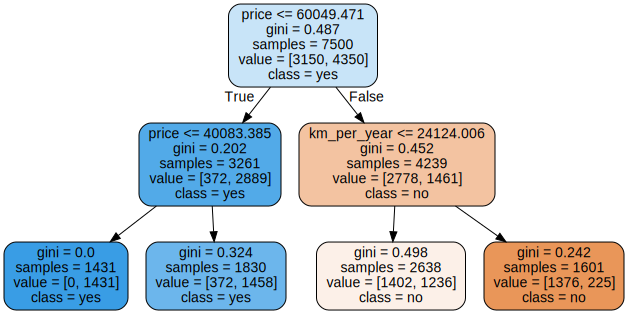

In [35]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=["no", "yes"])
graph = graphviz.Source(dot_data)
graph